In [12]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import awkward as ak
from utilities import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
DFs = import_data_files(["l1calo_hist_ZMUMU_extended.root", "l1calo_hist_EGZ_extended.root"])

accepted_numpy = ak.to_numpy(DFs[0]['SuperCell_ET'])
rejected_numpy = ak.to_numpy(DFs[1]['SuperCell_ET'])

In [3]:
accepted_labels = np.zeros(accepted_numpy.shape[0])
rejected_labels = np.ones(rejected_numpy.shape[0])

data = np.concatenate((accepted_numpy,rejected_numpy),axis=0)
labels = np.concatenate((accepted_labels,rejected_labels),axis=0)

np.random.seed(42)
np.random.shuffle(data)
np.random.seed(42)
np.random.shuffle(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [4]:
rbf_svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_svm_classifier.fit(X_train, y_train)
rbf_y_pred = rbf_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, rbf_y_pred)
print("Kernel: rbf")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n",classification_report(y_test, rbf_y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, rbf_y_pred))

Kernel: rbf
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     28387
         1.0       0.93      0.98      0.96     17795

    accuracy                           0.97     46182
   macro avg       0.96      0.97      0.96     46182
weighted avg       0.97      0.97      0.97     46182

Confusion Matrix:
 [[27132  1255]
 [  356 17439]]


In [5]:
linear_svm_classifier = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
linear_svm_classifier.fit(X_train, y_train)
linear_y_pred = linear_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, linear_y_pred)
print("Kernel: linear (degree 3)")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n",classification_report(y_test, linear_y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, linear_y_pred))

Kernel: linear (degree 3)
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     28387
         1.0       0.90      0.96      0.93     17795

    accuracy                           0.94     46182
   macro avg       0.94      0.94      0.94     46182
weighted avg       0.94      0.94      0.94     46182

Confusion Matrix:
 [[26498  1889]
 [  794 17001]]


In [6]:
poly_2_svm_classifier = SVC(kernel='poly', degree=2, C=1.0, gamma='scale', random_state=42)
poly_2_svm_classifier.fit(X_train, y_train)
poly_2_y_pred = poly_2_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, poly_2_y_pred)
print("Kernel: poly_2 (degree 3)")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n",classification_report(y_test, poly_2_y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, poly_2_y_pred))

Kernel: poly_2 (degree 3)
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     28387
         1.0       0.94      0.95      0.95     17795

    accuracy                           0.96     46182
   macro avg       0.96      0.96      0.96     46182
weighted avg       0.96      0.96      0.96     46182

Confusion Matrix:
 [[27375  1012]
 [  899 16896]]


In [7]:
poly_3_svm_classifier = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
poly_3_svm_classifier.fit(X_train, y_train)
poly_3_y_pred = poly_3_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, poly_3_y_pred)
print("Kernel: poly_3 (degree 3)")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n",classification_report(y_test, poly_3_y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, poly_3_y_pred))

Kernel: poly_3 (degree 3)
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     28387
         1.0       0.96      0.87      0.91     17795

    accuracy                           0.94     46182
   macro avg       0.94      0.92      0.93     46182
weighted avg       0.94      0.94      0.93     46182

Confusion Matrix:
 [[27749   638]
 [ 2354 15441]]


In [8]:
sigmoid_svm_classifier = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=42)
sigmoid_svm_classifier.fit(X_train, y_train)
sigmoid_y_pred = sigmoid_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, sigmoid_y_pred)
print("Kernel: sigmoid")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n",classification_report(y_test, sigmoid_y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, sigmoid_y_pred))

Kernel: sigmoid
Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     28387
         1.0       0.66      0.65      0.65     17795

    accuracy                           0.73     46182
   macro avg       0.72      0.72      0.72     46182
weighted avg       0.73      0.73      0.73     46182

Confusion Matrix:
 [[22301  6086]
 [ 6199 11596]]


In [13]:
tsne = TSNE(n_components=2, random_state=42)  
X_test_embedded = tsne.fit_transform(X_test) 

In [14]:
rbf_y_diff = np.logical_xor(y_test, rbf_y_pred)
linear_y_diff = np.logical_xor(y_test, linear_y_pred)
poly_2_y_diff = np.logical_xor(y_test, poly_2_y_pred) 
poly_3_y_diff = np.logical_xor(y_test, poly_3_y_pred) 
sigmoid_y_diff = np.logical_xor(y_test, sigmoid_y_pred) 

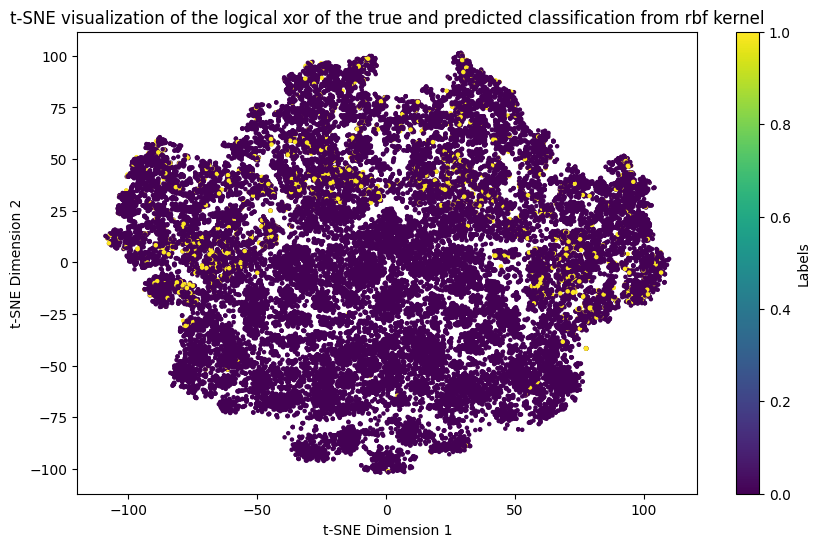

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=rbf_y_diff, cmap='viridis', s=5) 
plt.colorbar(label="Labels")
plt.title("t-SNE visualization of the logical xor of the true and predicted classification from rbf kernel")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

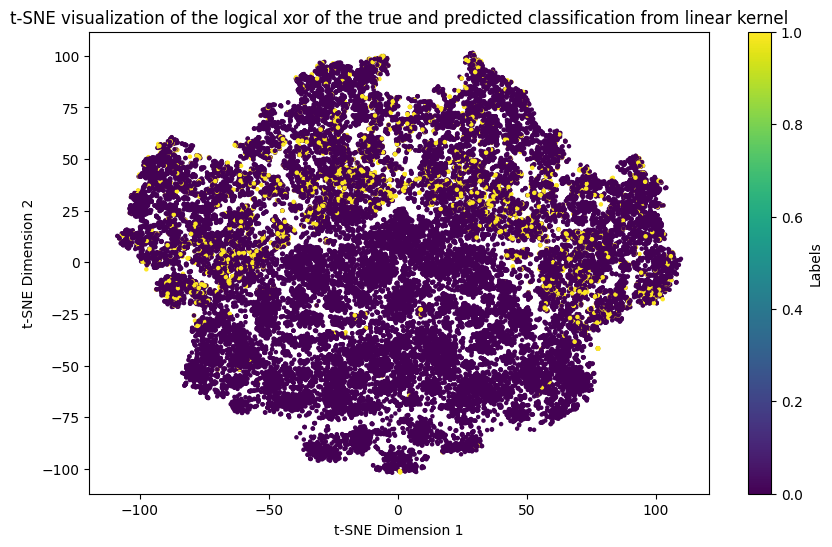

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=linear_y_diff, cmap='viridis', s=5) 
plt.colorbar(label="Labels")
plt.title("t-SNE visualization of the logical xor of the true and predicted classification from linear kernel")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

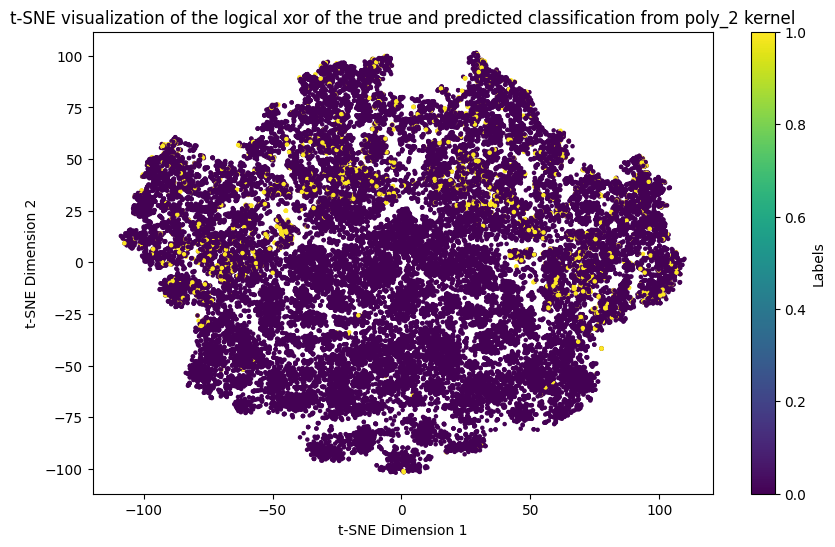

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=poly_2_y_diff, cmap='viridis', s=5) 
plt.colorbar(label="Labels")
plt.title("t-SNE visualization of the logical xor of the true and predicted classification from poly_2 kernel")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

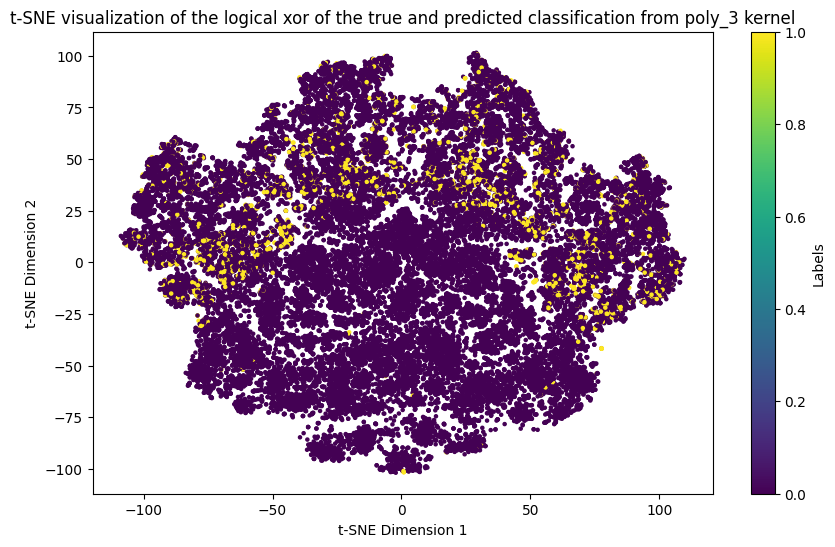

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=poly_3_y_diff, cmap='viridis', s=5) 
plt.colorbar(label="Labels")
plt.title("t-SNE visualization of the logical xor of the true and predicted classification from poly_3 kernel")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

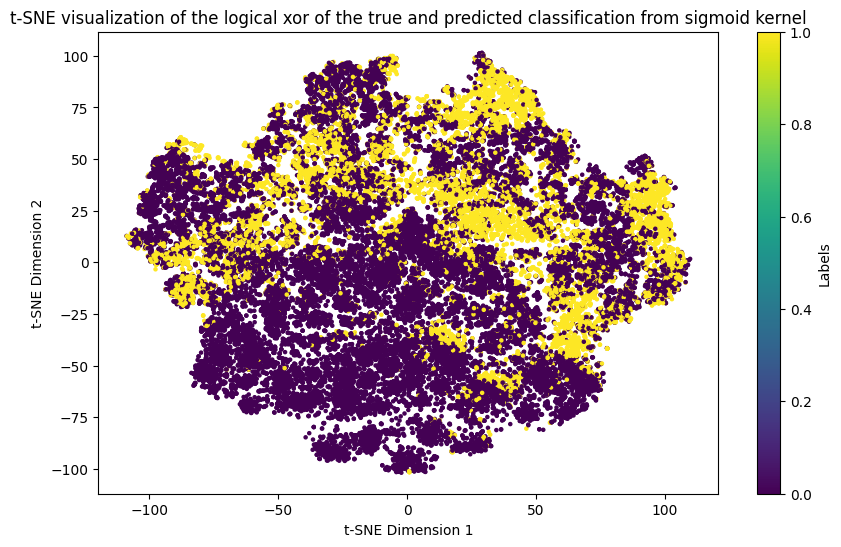

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_embedded[:, 0], X_test_embedded[:, 1], c=sigmoid_y_diff, cmap='viridis', s=5) 
plt.colorbar(label="Labels")
plt.title("t-SNE visualization of the logical xor of the true and predicted classification from sigmoid kernel")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()